# Análisis Descriptivo de la Gestión del negocio: Influenciadores clave

Un análisis descriptivo es un tipo de análisis que se utiliza para explorar y describir los datos, identificar patrones y tendencias y para generar estadísticas y visualizaciones que permitan entender los datos de manera más clara. En este caso, se utilizan las técnicas de correlación y pruebas estadísticas para identificar las variables que influyen en las ventas de la empresa ***AdventureWorks***.

Un análisis descriptivo no pretende hacer predicciones o recomendaciones, sino simplemente brindar una descripción más detallada de los datos y su relación entre ellos.

## Carga de las librerías de python necesarias

In [92]:
import pyodbc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm

plt.rcParams['figure.figsize'] = [12, 8]

Las librerías de Python son conjuntos de código predefinido que se utilizan para realizar tareas específicas en el lenguaje de programación Python.
Las librerías se utilizan para diferentes propósitos, como manipulación de datos, análisis de datos, visualización de datos, aprendizaje automático, desarrollo web, entre otros. 

## Extracción de los datos desde SQL Server

In [93]:
conn_str = pyodbc.connect('Driver={SQL Server};' 'Server=DESKTOP-QRE2MBQ;''Database=AdventureWorks2019;''Trusted_Connection=yes;')
# Query de DML(Data Manipulation Language) para obtener registros
input_query = '''select
	 -- Función para concatenar año y mes con guión de tabla 't1'(Sales.SalesOrderHeader) con alias 'fecha'
	 CONCAT_WS('-',YEAR(t1.OrderDate), MONTH(t1.OrderDate)) as 'fecha',
	 
	 -- Sumatorio de columna 't1.TotalDue' con alias 'ventas'
	 sum(t1.TotalDue) as 'ventas',
	 
	 -- Sumatorio de columna 't2.OrderQty' con alias 'cantidad' (t2='Sales.SalesOrderDetail')
	 sum(t2.OrderQty) as 'cantidad',
	 
	 -- Cantidad de registros distintos en columna 't1.SalesOrderID' con alias 'transacciones'
	 count(distinct t1.SalesOrderID) as 'transacciones',
	 
	 -- Sumatorio de columna 't1.TotalDue' dividido entre cantidad de registros distintos en columna 't1.SalesOrderID' con alias 'monto_promedio'
	 sum(t1.TotalDue)/count(distinct t1.SalesOrderID) as 'monto_promedio',
	 
	 -- Sumatorio de columna 't2.OrderQty' dividido entre cantidad de registros distintos en columna 't1.SalesOrderID' con alias 'cantidad_promedio'
	 sum(t2.OrderQty)/count(distinct t1.SalesOrderID) as 'cantidad_promedio',
	 
	 -- Cantidad de registros distintos en columna 't2.ProductID' con alias 'variedad'
	 count(distinct t2.ProductID) as 'variedad',
	 
	 -- Cantidad de registros distintos en columna 't1.CustomerID' con alias 'clientes'
	 count(distinct t1.CustomerID) as 'clientes',
	 
	 -- Estructura de control Condicional 'CASE-WHEN'
	 -- En el caso de que...
	 CASE
	 	-- se contabilice menos de un registro diferente en la columna 't1.SalesPersonID'
		-- entonces el la devolución será 1
		-- si no, se contabilizan los registros distintos de la columna 't1.SalesPersonID'
		WHEN count(distinct t1.SalesPersonID) < 1 THEN 1 ELSE count(distinct t1.SalesPersonID)
		-- al final el resultado se devuelve con alias 'vendedores'
		end as 'vendedores'
-- de la tabla.columna 'Sales.SalesOrderHeader' con alias t1
from Sales.SalesOrderHeader as t1
	-- que sean coincidentes con los registros de la tabla.columna 'Sales.SalesOrderDetail' con alias 't2'
	-- sobre la columna 'SalesOrderID' de ambas tablas
	Inner join Sales.SalesOrderDetail as t2 on t1.SalesOrderID = t2.SalesOrderID
	
	-- Agrupadas por año y mes de la tabla.columna 't1.OrderDate'
	group by YEAR(t1.OrderDate), MONTH(t1.OrderDate) 
	
	-- Ordenados por año y mes de la tabla.columna 't1.OrderDate'
	order by YEAR(t1.OrderDate), MONTH(t1.OrderDate)'''

sales_data = pd.read_sql(input_query, conn_str)

C:\Users\bytetech\AppData\Local\Temp\ipykernel_748\2845997567.py:49: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  sales_data = pd.read_sql(input_query, conn_str)


### - Explicar linea por linea la query utilizada arriba

In [94]:
sales_data

,fecha,ventas,cantidad,transacciones,monto_promedio,cantidad_promedio,variedad,clientes,vendedores
0,2011-5,8.094970e+06,825,43,188255.1210,19,47,43,9
1,2011-6,5.070965e+05,141,141,3596.4288,1,21,141,1
2,2011-7,2.608142e+07,2209,231,112906.5844,9,51,231,10
3,2011-8,3.800996e+07,2904,250,152039.8384,11,59,250,10
4,2011-9,5.547916e+05,157,157,3533.7045,1,22,157,1
5,2011-10,8.573987e+07,5382,327,262201.4520,16,60,327,10
6,2011-11,8.153130e+05,230,230,3544.8391,1,23,230,1
7,2011-12,1.098031e+07,1040,228,48159.2465,4,51,228,9
8,2012-1,5.743832e+07,3967,336,170947.3956,11,51,336,10
9,2012-2,1.792551e+07,1442,219,81851.6572,6,58,219,10


### - Explicar tabla de arriba, por ejemplo: ¿Que significa cada columna?

| **Campo**          | **Descripción**                                                                                           |
|--------------------|-----------------------------------------------------------------------------------------------------------|
| `fecha`            | Año y mes que agrupan los registros                                                                       |
| `ventas`           | Ventas del año-mes de la columna 'fecha' indicadas en notación científica (un coeficiente multiplicado por 10 elevado a algo) |
| `cantidad`         | Cantidad de productos vendidos por orden de compra                                                        |
| `transacciones`    | Cantidad de transacciones distintas por cada mes                                                          |
| `monto_promedio`   | Cantidad promedio de ventas agrupadas por año-mes de la 'fecha'                                           |
| `cantidad_promedio`| Cantidad promedio de productos vendidos por orden de compra diferente en cada mes                         |
| `variedad`         | Cantidad de productos diferentes vendidos por mes                                                         |
| `clientes`         | Cantidad de clientes diferentes por mes                                                                   |
| `vendedores`       | Cantidad de ventas por vendedor diferente en el mes                                                       |


### - Aproximar a dos decimales el monto_promedio

In [95]:
conn_str = pyodbc.connect('Driver={SQL Server};' 'Server=DESKTOP-QRE2MBQ;''Database=AdventureWorks2019;''Trusted_Connection=yes;')

input_query = '''
SELECT
    CONCAT_WS('-', YEAR(t1.OrderDate), MONTH(t1.OrderDate)) AS 'fecha',
    SUM(t1.TotalDue) AS 'ventas',
    SUM(t2.OrderQty) AS 'cantidad',
    COUNT(DISTINCT t1.SalesOrderID) AS 'transacciones',
    ROUND(SUM(t1.TotalDue) / COUNT(DISTINCT t1.SalesOrderID), 2) AS 'monto_promedio',
    SUM(t2.OrderQty) / COUNT(DISTINCT t1.SalesOrderID) AS 'cantidad_promedio',
    COUNT(DISTINCT t2.ProductID) AS 'variedad',
    COUNT(DISTINCT t1.CustomerID) AS 'clientes',
    CASE
        WHEN COUNT(DISTINCT t1.SalesPersonID) < 1 THEN 1 ELSE COUNT(DISTINCT t1.SalesPersonID)
        END AS 'vendedores'
FROM Sales.SalesOrderHeader AS t1
INNER JOIN Sales.SalesOrderDetail AS t2 ON t1.SalesOrderID = t2.SalesOrderID
GROUP BY YEAR(t1.OrderDate), MONTH(t1.OrderDate)
ORDER BY YEAR(t1.OrderDate), MONTH(t1.OrderDate)
'''
sales_data = pd.read_sql(input_query, conn_str)

C:\Users\bytetech\AppData\Local\Temp\ipykernel_748\4204265737.py:21: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  sales_data = pd.read_sql(input_query, conn_str)


In [96]:
sales_data

,fecha,ventas,cantidad,transacciones,monto_promedio,cantidad_promedio,variedad,clientes,vendedores
0,2011-5,8.094970e+06,825,43,188255.12,19,47,43,9
1,2011-6,5.070965e+05,141,141,3596.43,1,21,141,1
2,2011-7,2.608142e+07,2209,231,112906.58,9,51,231,10
3,2011-8,3.800996e+07,2904,250,152039.84,11,59,250,10
4,2011-9,5.547916e+05,157,157,3533.70,1,22,157,1
5,2011-10,8.573987e+07,5382,327,262201.45,16,60,327,10
6,2011-11,8.153130e+05,230,230,3544.84,1,23,230,1
7,2011-12,1.098031e+07,1040,228,48159.25,4,51,228,9
8,2012-1,5.743832e+07,3967,336,170947.40,11,51,336,10
9,2012-2,1.792551e+07,1442,219,81851.66,6,58,219,10


### - Efectuar la misma conexión a la base de datos usando SQLAlchemy, usar también la misma query.

In [97]:
from sqlalchemy import create_engine
# Configurar la conexión a la base de datos
engine = create_engine('mssql+pyodbc://DESKTOP-QRE2MBQ/AdventureWorks2019?driver=ODBC+Driver+17+for+SQL+Server')
query = '''
SELECT
    CONCAT_WS('-', YEAR(t1.OrderDate), MONTH(t1.OrderDate)) AS 'fecha',
    SUM(t1.TotalDue) AS 'ventas',
    SUM(t2.OrderQty) AS 'cantidad',
    COUNT(DISTINCT t1.SalesOrderID) AS 'transacciones',
    ROUND(SUM(t1.TotalDue) / COUNT(DISTINCT t1.SalesOrderID), 2) AS 'monto_promedio',
    SUM(t2.OrderQty) / COUNT(DISTINCT t1.SalesOrderID) AS 'cantidad_promedio',
    COUNT(DISTINCT t2.ProductID) AS 'variedad',
    COUNT(DISTINCT t1.CustomerID) AS 'clientes',
    CASE
        WHEN COUNT(DISTINCT t1.SalesPersonID) < 1 THEN 1 ELSE COUNT(DISTINCT t1.SalesPersonID)
        END AS 'vendedores'
FROM Sales.SalesOrderHeader AS t1
INNER JOIN Sales.SalesOrderDetail AS t2 ON t1.SalesOrderID = t2.SalesOrderID
GROUP BY YEAR(t1.OrderDate), MONTH(t1.OrderDate)
ORDER BY YEAR(t1.OrderDate), MONTH(t1.OrderDate)
'''
# Ejecutar consulta y almacenar resultado en DataFrame
sales_data = pd.read_sql(query, engine)
# Mostrar resultados
sales_data

,fecha,ventas,cantidad,transacciones,monto_promedio,cantidad_promedio,variedad,clientes,vendedores
0,2011-5,8.094970e+06,825,43,188255.12,19,47,43,9
1,2011-6,5.070965e+05,141,141,3596.43,1,21,141,1
2,2011-7,2.608142e+07,2209,231,112906.58,9,51,231,10
3,2011-8,3.800996e+07,2904,250,152039.84,11,59,250,10
4,2011-9,5.547916e+05,157,157,3533.70,1,22,157,1
5,2011-10,8.573987e+07,5382,327,262201.45,16,60,327,10
6,2011-11,8.153130e+05,230,230,3544.84,1,23,230,1
7,2011-12,1.098031e+07,1040,228,48159.25,4,51,228,9
8,2012-1,5.743832e+07,3967,336,170947.40,11,51,336,10
9,2012-2,1.792551e+07,1442,219,81851.66,6,58,219,10


## Exploración del dataset extraído

### - Muestre la información general del dataframe

In [98]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   fecha              38 non-null     object 
 1   ventas             38 non-null     float64
 2   cantidad           38 non-null     int64  
 3   transacciones      38 non-null     int64  
 4   monto_promedio     38 non-null     float64
 5   cantidad_promedio  38 non-null     int64  
 6   variedad           38 non-null     int64  
 7   clientes           38 non-null     int64  
 8   vendedores         38 non-null     int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 2.8+ KB


### - Muestre los tipos de datos de cada columna:

In [99]:
sales_data.dtypes

fecha                 object
ventas               float64
cantidad               int64
transacciones          int64
monto_promedio       float64
cantidad_promedio      int64
variedad               int64
clientes               int64
vendedores             int64
dtype: object

### - Dimensiones del dataframe (shape)

In [100]:
sales_data.shape

(38, 9)

### - Imprima un resumen de las principales estadisticas descriptivas para el dataframe ventas: count, mean, std, min, 25%,  50%, 75%, max. Explique e interprete la salida. 

In [101]:
sales_data.describe()

,ventas,cantidad,transacciones,monto_promedio,cantidad_promedio,variedad,clientes,vendedores
count,3.800000e+01,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000
mean,7.702553e+07,7234.578947,828.026316,147862.879737,11.342105,101.631579,808.842105,11.236842
std,6.051102e+07,5601.450467,796.913149,124012.409291,7.826760,51.404817,769.105536,5.074761
min,1.461499e+05,141.000000,43.000000,155.640000,1.000000,21.000000,43.000000,1.000000
25%,2.606614e+07,2974.000000,287.000000,49202.022500,5.250000,58.250000,287.000000,10.000000
50%,7.756321e+07,5609.000000,384.000000,111793.300000,9.500000,99.500000,384.000000,12.500000
75%,1.215372e+08,10851.750000,1752.000000,259254.020000,17.750000,145.000000,1703.500000,15.750000
max,2.150542e+08,22582.000000,2411.000000,432681.920000,28.000000,196.000000,2350.000000,17.000000


__1. EXPLICACIÓN__

Todas las columnas tienen como referencia los datos agrupados por mes y año:
- __count__: contabiliza los registros no-nulos de la query. En todas las columnas devuelve 38
- __mean__: 'media aritmética'. Medida de tendencia central que representa el valor que representa el centro del conjunto
- __std__: la 'desviación estandar' cuantifica la cantidad de variación o dispersión de un conjunto de valores en relación a la media (promedio) del conjunto de datos.
- __min__: 	el 'mínimo' es el valor más pequeño de un conjunto de datos. Puede dar información de la dispersión, rango, tendencia, forma de los datos y valores atípicos de la distribución.
- __25%__: el 'primer cuartil' deja por debajo el 25% del conjunto de valores de la distribución
- __50%__: el 'segundo cuartil' deja por debajo el 50% del conjunto de valores de la distribución. Es la medida de tendencia central llamada Mediana.
- __75%__: el 'tercer cuartil' deja por debajo el 75% del conjunto de valores de la distribución
- __max__: el 'máximo' es el límite superior del conjunto de datos o distribución. Junto con el 'mínimo' e igual que él, nos da información sobre la dispersión, el rango, t3endencia, forma y valores atípicos de la distribución.


__2. INTERPRETACIÓN__
- __Ventas__: Los valores de ventas presentan una alta dispersión con una media elevada, reflejando una variabilidad significativa en las ventas mensuales.
- __Cantidad y Transacciones__: Ambas tienen una alta variabilidad, indicando que tanto la cantidad de productos vendidos como las transacciones fluctúan considerablemente mes a mes.
- __Monto Promedio y Cantidad Promedio__: Los valores promedio también muestran variabilidad, lo cual es coherente con las fluctuaciones en ventas y transacciones.
- __Variedad, Clientes y Vendedores__: Estas métricas indican una amplia gama de productos, clientes y vendedores involucrados en las transacciones, con cierta dispersión pero con valores medianos que sugieren una actividad consistente en promedio.

### - Aproxime los resultados anteriores a dos decimales aquellas columnas que lo requieran

In [102]:
#sales_data_rounded = sales_data.describe()
#sales_data_round_df = sales_data_rounded.round(2)
#sales_data_round_df

#(sales_data.describe()).round(2)

cols_to_round_2_decimals = ['ventas', 'monto_promedio']
cols_no_round = ['cantidad', 'transacciones', 'cantidad_promedio', 'variedad', 'clientes', 'vendedores']

# Redondear las columnas especificadas
sales_data[cols_to_round_2_decimals] = sales_data[cols_to_round_2_decimals].round(2)

# Las otras columnas permanecen igual

# Mostrar el DataFrame resultante
sales_data

,fecha,ventas,cantidad,transacciones,monto_promedio,cantidad_promedio,variedad,clientes,vendedores
0,2011-5,8.094970e+06,825,43,188255.12,19,47,43,9
1,2011-6,5.070965e+05,141,141,3596.43,1,21,141,1
2,2011-7,2.608142e+07,2209,231,112906.58,9,51,231,10
3,2011-8,3.800996e+07,2904,250,152039.84,11,59,250,10
4,2011-9,5.547916e+05,157,157,3533.70,1,22,157,1
5,2011-10,8.573987e+07,5382,327,262201.45,16,60,327,10
6,2011-11,8.153130e+05,230,230,3544.84,1,23,230,1
7,2011-12,1.098031e+07,1040,228,48159.25,4,51,228,9
8,2012-1,5.743832e+07,3967,336,170947.40,11,51,336,10
9,2012-2,1.792551e+07,1442,219,81851.66,6,58,219,10


### - Imprimir en un objeto tipo Index todas las columnas del dataframe

In [103]:
sales_data.columns

Index(['fecha', 'ventas', 'cantidad', 'transacciones', 'monto_promedio',
       'cantidad_promedio', 'variedad', 'clientes', 'vendedores'],
      dtype='object')

### - Muestre el contenido de las primeras 15 líneas del dataframe

In [104]:
sales_data.head(15)

,fecha,ventas,cantidad,transacciones,monto_promedio,cantidad_promedio,variedad,clientes,vendedores
0,2011-5,8.094970e+06,825,43,188255.12,19,47,43,9
1,2011-6,5.070965e+05,141,141,3596.43,1,21,141,1
2,2011-7,2.608142e+07,2209,231,112906.58,9,51,231,10
3,2011-8,3.800996e+07,2904,250,152039.84,11,59,250,10
4,2011-9,5.547916e+05,157,157,3533.70,1,22,157,1
5,2011-10,8.573987e+07,5382,327,262201.45,16,60,327,10
6,2011-11,8.153130e+05,230,230,3544.84,1,23,230,1
7,2011-12,1.098031e+07,1040,228,48159.25,4,51,228,9
8,2012-1,5.743832e+07,3967,336,170947.40,11,51,336,10
9,2012-2,1.792551e+07,1442,219,81851.66,6,58,219,10


### - Muestre las últimas cinco líneas del dataframe

In [105]:
sales_data.tail(5)

,fecha,ventas,cantidad,transacciones,monto_promedio,cantidad_promedio,variedad,clientes,vendedores
33,2014-2,4.094288e+06,4287,1756,2331.60,2,109,1713,2
34,2014-3,2.150542e+08,22582,2399,89643.29,9,173,2342,17
35,2014-4,5.567935e+06,5313,2115,2632.59,2,108,2058,1
36,2014-5,1.353521e+08,15884,2411,56139.42,6,166,2350,16
37,2014-6,1.461499e+05,2130,939,155.64,2,42,898,1


### Calcular el cambio procentual (o incremento porcentual) de las ventas mes a mes. Recordar el ejemplo realizado en clase con las acciones de las 'Big Four' del 2010.

In [106]:
sales_data["incremento_ventas"] = sales_data["ventas"].pct_change() * 100
reorder_columns = ["fecha","ventas","incremento_ventas","cantidad","transacciones",
                    "monto_promedio","cantidad_promedio","variedad","clientes","vendedores"]
sales_data = sales_data[reorder_columns]
sales_data

,fecha,ventas,incremento_ventas,cantidad,transacciones,monto_promedio,cantidad_promedio,variedad,clientes,vendedores
0,2011-5,8.094970e+06,NaN,825,43,188255.12,19,47,43,9
1,2011-6,5.070965e+05,-93.735660,141,141,3596.43,1,21,141,1
2,2011-7,2.608142e+07,5043.285854,2209,231,112906.58,9,51,231,10
3,2011-8,3.800996e+07,45.735770,2904,250,152039.84,11,59,250,10
4,2011-9,5.547916e+05,-98.540405,157,157,3533.70,1,22,157,1
5,2011-10,8.573987e+07,15354.428882,5382,327,262201.45,16,60,327,10
6,2011-11,8.153130e+05,-99.049085,230,230,3544.84,1,23,230,1
7,2011-12,1.098031e+07,1246.759827,1040,228,48159.25,4,51,228,9
8,2012-1,5.743832e+07,423.103029,3967,336,170947.40,11,51,336,10
9,2012-2,1.792551e+07,-68.791721,1442,219,81851.66,6,58,219,10


### - Calcular el promedio de ventas de por trimestre y por año.

In [107]:
# Convertir la columna 'fecha' a tipo datetime para que funcione ".resample('Q').mean()"
sales_data['fecha'] = pd.to_datetime(sales_data['fecha'])

# Establecer la columna 'fecha' como índice
sales_data.set_index('fecha', inplace=True)

# Calcular el promedio de ventas por trimestre
promedio_trimestral = sales_data['ventas'].resample('QE').mean()

# Imprimir el resultado
print("Promedio de ventas por trimestre:")
promedio_trimestral


Promedio de ventas por trimestre:


fecha
2011-06-30    4.301033e+06
2011-09-30    2.154872e+07
2011-12-31    3.251183e+07
2012-03-31    4.154580e+07
2012-06-30    1.046798e+08
2012-09-30    1.131052e+08
2012-12-31    6.492832e+07
2013-03-31    8.179632e+07
2013-06-30    1.354716e+08
2013-09-30    1.400741e+08
2013-12-31    9.031402e+07
2014-03-31    9.979151e+07
2014-06-30    4.702207e+07
Freq: QE-DEC, Name: ventas, dtype: float64

In [108]:
# Calcular el promedio de ventas por año
promedio_anual = sales_data['ventas'].resample('YE').mean()

# Imprimir el resultado
print("\nPromedio de ventas por año:")
promedio_anual



Promedio de ventas por año:


fecha
2011-12-31    2.134797e+07
2012-12-31    8.106478e+07
2013-12-31    1.119140e+08
2014-12-31    7.340679e+07
Freq: YE-DEC, Name: ventas, dtype: float64

## Procesamiento de los datos: Cálculo de la correlación entre las variables

### - Seleccionar solo columnas numéricas del dataframe:

In [109]:
# Seleccionar solo columnas numéricas
numerical_sales_data = sales_data.select_dtypes(include='number')


### - Imprima la nueva dataset con las columnas numéricas

In [110]:
# Imprimir el DataFrame con solo columnas numéricas
numerical_sales_data

,ventas,incremento_ventas,cantidad,transacciones,monto_promedio,cantidad_promedio,variedad,clientes,vendedores
fecha,,,,,,,,,
2011-05-01,8.094970e+06,NaN,825,43,188255.12,19,47,43,9
2011-06-01,5.070965e+05,-93.735660,141,141,3596.43,1,21,141,1
2011-07-01,2.608142e+07,5043.285854,2209,231,112906.58,9,51,231,10
2011-08-01,3.800996e+07,45.735770,2904,250,152039.84,11,59,250,10
2011-09-01,5.547916e+05,-98.540405,157,157,3533.70,1,22,157,1
2011-10-01,8.573987e+07,15354.428882,5382,327,262201.45,16,60,327,10
2011-11-01,8.153130e+05,-99.049085,230,230,3544.84,1,23,230,1
2011-12-01,1.098031e+07,1246.759827,1040,228,48159.25,4,51,228,9
2012-01-01,5.743832e+07,423.103029,3967,336,170947.40,11,51,336,10


### - Calcular la correlación, imprima la matriz de correlación.

In [111]:
correlation = numerical_sales_data.corr()
correlation

,ventas,incremento_ventas,cantidad,transacciones,monto_promedio,cantidad_promedio,variedad,clientes,vendedores
ventas,1.000000,0.110653,0.905770,0.340578,0.518040,0.560443,0.786085,0.343143,0.756155
incremento_ventas,0.110653,1.000000,0.064155,-0.011070,0.098170,0.059987,-0.091746,-0.009347,0.033470
cantidad,0.905770,0.064155,1.000000,0.695079,0.150793,0.220271,0.911487,0.696895,0.741270
transacciones,0.340578,-0.011070,0.695079,1.000000,-0.471896,-0.419235,0.691916,0.999950,0.344915
monto_promedio,0.518040,0.098170,0.150793,-0.471896,1.000000,0.980627,0.135919,-0.469092,0.351248
cantidad_promedio,0.560443,0.059987,0.220271,-0.419235,0.980627,1.000000,0.227174,-0.416486,0.421830
variedad,0.786085,-0.091746,0.911487,0.691916,0.135919,0.227174,1.000000,0.693319,0.749922
clientes,0.343143,-0.009347,0.696895,0.999950,-0.469092,-0.416486,0.693319,1.000000,0.346082
vendedores,0.756155,0.033470,0.741270,0.344915,0.351248,0.421830,0.749922,0.346082,1.000000


### Graficar la matriz de correlación siguiendo el estilo de un mapa de calor:

### - Explicar línea por línea el siguiente código:

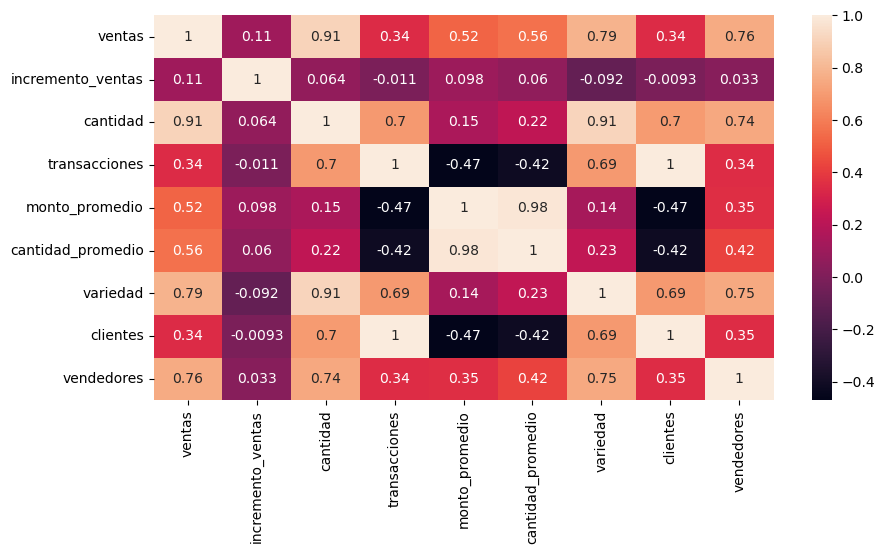

In [112]:
# Definición del tamaño de la matriz en pulgadas(10 x 5)
plt.figure(figsize=(10,5))

# Mediante librería seaborn aplicamos mapa de calor sobre la correlación 
# del dataframe con columnas numéricas con los nombres de columnas contenidos en el dataframe 'correlation'
# añadiendo los valores de la correlación a cada cuadrícula
sns.heatmap(numerical_sales_data[correlation.index].corr(), annot=True)

# Visualización del plot
plt.show()

### - Describa y explique la salida (la matriz de correlación) anterior

__1. EXPLICACIÓN__
- Los colores van desde tonos oscuros (negro) indicando correlación negativa fuerte, a tonos claros (blanco) indicando correlación positiva fuerte, con tonos intermedios (naranja, rojo) para correlaciones moderadas.

__2. DESCRIPCIÓN__
- __2.1. Diagonal Principal__:
    - muestra siempre un valor de 1, porque cada variable está perfectamente correlacionada consigo misma.

- __2.2. Correlaciones Fuertes__:
    - __ventas y cantidad__: Correlación de 0.91, indicando que a medida que aumentan las ventas, también aumenta la cantidad de productos vendidos.
    - __cantidad_promedio y monto_promedio__: Correlación de 0.98, lo que sugiere que a medida que aumenta el monto promedio de las transacciones, también aumenta la cantidad promedio.
    - __ventas y variedad__: Correlación de 0.79, lo que indica que un aumento en la variedad de productos vendidos está asociado con un aumento en las ventas.

- __2.3. Correlaciones Moderadas__:
    - __ventas y vendedores__: Correlación de 0.76, lo que sugiere que un mayor número de vendedores está asociado con mayores ventas.
    - __transacciones y cantidad__: Correlación de 0.70, indicando que un mayor número de transacciones está asociado con una mayor cantidad de productos vendidos.

- __2.4. Correlaciones Negativas__:
    - __transacciones y monto_promedio__: Correlación de -0.47, indicando que un mayor número de transacciones está asociado con un menor monto promedio por transacción.
    - __transacciones y cantidad_promedio__: Correlación de -0.42, lo que sugiere que a medida que aumentan las transacciones, la cantidad promedio por transacción disminuye.

- __2.5. Correlaciones Bajas o Nulas__:
    - __incremento_ventas y variedad__: Correlación de -0.092, indicando poca o ninguna relación entre el incremento en ventas y la variedad de productos.
    - __incremento_ventas y clientes__: Correlación de -0.0093, mostrando poca o ninguna relación entre el incremento en ventas y el número de clientes. 

### Selección de las variables más correlacionadas con las ventas

In [113]:
# Extraemos la correlación de la columna 'ventas' con las demás
# ordenando los valores de forma desdencente
correlation = correlation["ventas"].sort_values(ascending=False)

In [114]:
correlation

ventas               1.000000
cantidad             0.905770
variedad             0.786085
vendedores           0.756155
cantidad_promedio    0.560443
monto_promedio       0.518040
clientes             0.343143
transacciones        0.340578
incremento_ventas    0.110653
Name: ventas, dtype: float64

### Explicar el código dado arriba

### - Visualización gráfica de las variables correlacionadas

### - Explicar linea por línea el siguiente código:

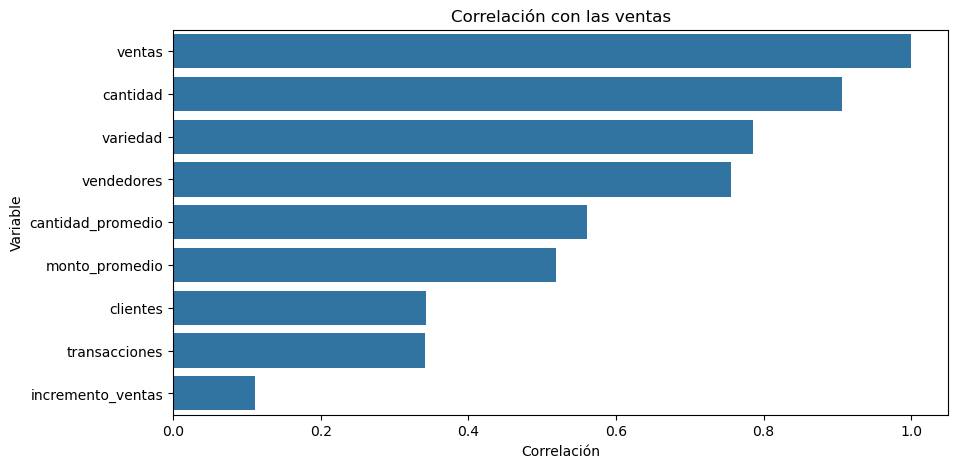

In [115]:
# Definición de una figura con tamaño: 10 x 5 pulgadas
plt.figure(figsize=(10,5))
# Creación de un gráfico de barras con 
#   - los valores de la correlación en eje X
#   - nombres de las columnas en eje Y
sns.barplot(x=correlation.values, y=correlation.index)
# Se establece el título de la gráfica
plt.title("Correlación con las ventas")
# Se establece la etiqueta del eje X
plt.xlabel("Correlación")
# Se establece la etiqueta del eje Y
plt.ylabel("Variable")
# Visualización de la gráfica
plt.show()

### - Interpretar el plot de arriba

__Conclusiones__:

- Muestra la correlación del parámetro `ventas` con el resto de columnas en orden descendente
- En el `eje X` indica el __valor de correlación__ desde 0.0 a 1.0
- En el `eje Y` muestra el __nombre de los parámetros__(columnas)

- Correlación __fuerte__:
    - `cantidad`: sugiere que a medida que aumenta la cantidad de productos vendidos, las ventas también aumentan significativamente.
    - `variedad`: ofrecer una mayor variedad de productos está asociado con un aumento en las ventas.
    - `vendedores`: tener más vendedores está asociado con un aumento en las ventas.
- Correlación __moderada__:
    - `cantidad_promedio`: a medida que aumenta la cantidad promedio por transacción, las ventas también tienden a aumentar.
    - `monto_promedio`: sugiere que transacciones con montos promedio más altos están asociadas con mayores ventas.
- Correlación __débil__:
    - `transacciones`: un mayor número de transacciones está asociado con mayores ventas.
    - `clientes`: tener más clientes está asociado con un aumento en las ventas, aunque la relación no es tan fuerte como con otras variables.

- La `cantidad` es el más correlacionado con `ventas` con un `0.9`(aprox.)
- La columna `transacciones` tiene la relación directa más pequeña con `0.3`(aprox), 

### - Seleccionar las variables mas correlacionadas,  esta vez con monto_promedio

In [129]:
correlation_matrix = numerical_sales_data.corr()

In [139]:
# Definir umbrales para alta, media y baja correlación
high_threshold = 0.7
medium_threshold = 0.3

# Obtener las correlaciones con 'monto_promedio'
correlation_with_monto_promedio = correlation_matrix['monto_promedio']
correlation_with_monto_promedio

ventas               0.518040
incremento_ventas    0.098170
cantidad             0.150793
transacciones       -0.471896
monto_promedio       1.000000
cantidad_promedio    0.980627
variedad             0.135919
clientes            -0.469092
vendedores           0.351248
Name: monto_promedio, dtype: float64

In [138]:
# Filtrar las variables con alta, media y baja correlación
high_corr_vars = correlation_with_monto_promedio[abs(correlation_with_monto_promedio) >= high_threshold]
medium_corr_vars = correlation_with_monto_promedio[(abs(correlation_with_monto_promedio) >= medium_threshold) & 
                                                    (abs(correlation_with_monto_promedio) < high_threshold)]

# Concatenar las variables con alta y media correlación
selected_vars = pd.concat([high_corr_vars, medium_corr_vars])

selected_vars

monto_promedio       1.000000
cantidad_promedio    0.980627
ventas               0.518040
transacciones       -0.471896
clientes            -0.469092
vendedores           0.351248
Name: monto_promedio, dtype: float64

### - Visualización gráfica de las variables correlacionadas con monto_promedio

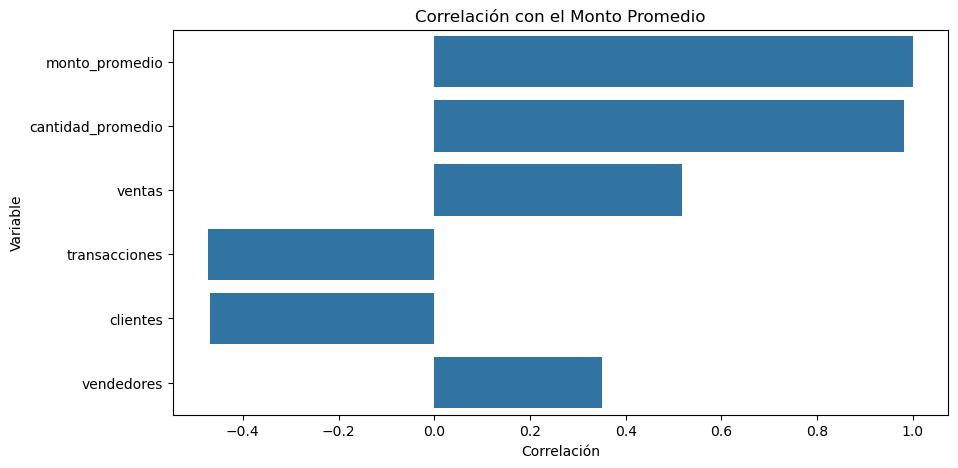

In [140]:
# Definición de una figura con tamaño: 10 x 5 pulgadas
plt.figure(figsize=(10,5))
sns.barplot(x=selected_vars.values, y=selected_vars.index)
# Se establece el título de la gráfica
plt.title("Correlación con el Monto Promedio")
# Se establece la etiqueta del eje X
plt.xlabel("Correlación")
# Se establece la etiqueta del eje Y
plt.ylabel("Variable")
# Visualización de la gráfica
plt.show()

## Pruebas formales para determinar la influencia de cada variable en las ventas

Las pruebas formales se refieren a un conjunto de técnicas estadísticas y matemáticas que se utilizan para validar las hipótesis y afirmaciones hechas sobre los datos en un estudio o análisis.

Asimismo, las pruebas formales son una parte importante del análisis de datos ya que permiten tomar decisiones basadas en evidencia sólida en lugar de basarse únicamente en la intuición o el juicio subjetivo. 

Estas pruebas ayudan a los investigadores a determinar si los patrones o relaciones observados en los datos son estadísticamente significativos o simplemente el resultado del azar.

### - Explicar línea por línea el siguiente código:

In [178]:
# Creación de lista vacía
influencers = []
# Bucle para recorrer los nombres de las columnas contenidos en la correlación
for variable in correlation.index:
      
    """  
    ERROR:
    p_value, corr = stats.pearsonr(numerical_sales_data["monto_promedio"], numerical_sales_data[variable])
    La función 'stats.pearsonr()' devuelve primero el coeficiente de correlación de pearson 
    y en segundo lugar el valor de probabilidad del coeficiente en caso nulo

    scipy.stats.
    pearsonr
    https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html#scipy.stats.pearsonr
    """
    
    # Se calcula el coeficiente de correlación de Pearson(corr) y su p-valor(p_value: probabilidad de que el coeficiente encontrado sea nulo) 
    # entre las ventas (numerical_sales_data["monto_promedio"]) y el resto de columnas(numerical_sales_data[variable]).
    corr, p_value = stats.pearsonr(numerical_sales_data["ventas"], numerical_sales_data[variable])

    # Si el valor p de la correlación es menor o igual a 0.05
    if p_value <= 0.05:
        # Añadimos la variable y su correlación con 'monto_promedio' a la lista
        influencers.append((variable, corr))
    # Si el valor p de la correlación es mayor que 0.05
    elif p_value > 0.05:
        # Añadimos la variable y su correlación con 'monto_promedio' como 'No significativo' a la lista
        influencers.append((variable, corr, "No significativo"))
influencers

[('ventas', np.float64(0.9999999999999996)),
 ('cantidad', np.float64(0.905770375204089)),
 ('variedad', np.float64(0.7860849989927886)),
 ('vendedores', np.float64(0.7561545193229853)),
 ('cantidad_promedio', np.float64(0.560442823108254)),
 ('monto_promedio', np.float64(0.5180397131183639)),
 ('clientes', np.float64(0.34314319179502883)),
 ('transacciones', np.float64(0.34057813714519286))]

### - Utlizar código de arriba pero tomando como referencia la varible monto_promedio

In [167]:
# Creación de lista vacía
influencers_monto = []
# Bucle para recorrer los nombres de las columnas contenidos en la correlación
for variable in correlation.index:      
    """
    ERROR:
    p_value, corr = stats.pearsonr(numerical_sales_data["monto_promedio"], numerical_sales_data[variable])
    La función 'stats.pearsonr()' devuelve primero el coeficiente de correlación de pearson 
    y en segundo lugar el valor de probabilidad del coeficiente
    
    scipy.stats.
    pearsonr
    https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html#scipy.stats.pearsonr
    """    
    # Se calcula el coeficiente de correlación de Pearson(corr) y su p-valor(p_value: probabilidad de que el coeficiente encontrado sea nulo) 
    # entre las ventas (numerical_sales_data["monto_promedio"]) y el resto de columnas(numerical_sales_data[variable]).
    corr, p_value = stats.pearsonr(numerical_sales_data["monto_promedio"], numerical_sales_data[variable])
    # Si el valor p de la correlación es menor o igual a 0.05
    if p_value <= 0.05:
        # Añadimos la variable y su correlación con 'monto_promedio' a la lista
        influencers_monto.append((variable, corr))
    # Si el valor p de la correlación es mayor que 0.05
    elif p_value > 0.05:
        # Añadimos la variable y su correlación con 'monto_promedio' como 'No significativo' a la lista
        influencers_monto.append((variable, corr, "No significativo"))
influencers_monto

[('ventas', np.float64(0.5180397131183639)),
 ('cantidad', np.float64(0.15079322743395768), 'No significativo'),
 ('variedad', np.float64(0.13591929379858544), 'No significativo'),
 ('vendedores', np.float64(0.3512481833923967)),
 ('cantidad_promedio', np.float64(0.9806270573176384)),
 ('monto_promedio', np.float64(0.9999999999999999)),
 ('clientes', np.float64(-0.46909170561005376)),
 ('transacciones', np.float64(-0.47189568754686967))]

### Impresión de los resultados

__1. VENTAS__

- __1.1. Con Correlación significativa__:

    - __Correlaciones Fuertes__: 
        - `cantidad`
        - `variedad`
        - `vendedores`  
     
    - __Correlaciones Moderadas__:
        - `cantidad_promedio`
        - `monto_promedio`

    - __Correlaciones Débiles__: 
        - `clientes`
        - `transacciones`
        

__2. MONTO PROMEDIO__

- __2.1. Con Correlación significativa__:

    - __Correlaciones Fuertes__: 
        - `cantidad_promedio`
        - sugiere que estos factores son importantes para determinar el monto promedio.

    - __Correlaciones Moderadas__:
        - `ventas`               
        - están positivamente correlacionados con el monto promedio, pero de manera moderada.

    - __Correlaciones Moderadas Negativas__:
        - `transacciones`

    - __Correlaciones Débiles__: 
        - `vendedores`         
        - tienen correlaciones positivas débiles con las ventas, aunque todavía son significativas.

- __2.2. Sin Correlación significativa__:
    - `cantidad` 
    - `variedad`




### - Explicar línea por línea el siguiente código:  

In [174]:
""" print("Variables influyentes en las ventas:")
for variable, corr, significance in influencers:
    if len(influencers) > 2:
        print(f"{variable}: correlación = {corr:.2f} ({significance})")
    else:
        print(f"{variable}: correlación = {corr:.2f}") """

print("Variables influyentes en las ventas:")
for influencer in influencers:
    if len(influencer) == 3:
        variable, corr, significance = influencer
        print(f"{variable}: correlación = {corr:.2f} ({significance})")
    elif len(influencer) == 2:
        variable, corr = influencer
        print(f"{variable}: correlación = {corr:.2f}")
    else:
        print("Tupla no válida:", influencer)


Variables influyentes en las ventas:
ventas: correlación = 1.00
cantidad: correlación = 0.91
variedad: correlación = 0.79
vendedores: correlación = 0.76
cantidad_promedio: correlación = 0.56
monto_promedio: correlación = 0.52
clientes: correlación = 0.34
transacciones: correlación = 0.34


Se agregó una comprobación de la hipótesis nula antes de imprimir los resultados de la prueba de correlación. La hipótesis nula establece que no existe una correlación entre las variables, y se rechaza si el **valor p es menor que 0,05**. 

### - Rehacer el código de arriba pero usando monto_promedio

In [176]:
print("Variables influyentes en el monto promedio:")
for influencer in influencers_monto:
    if len(influencer) == 3:
        variable, corr, significance = influencer
        print(f"{variable}: correlación = {corr:.2f} ({significance})")
    elif len(influencer) == 2:
        variable, corr = influencer
        print(f"{variable}: correlación = {corr:.2f}")
    else:
        print("Tupla no válida:", influencer)


Variables influyentes en el monto promedio:
ventas: correlación = 0.52
cantidad: correlación = 0.15 (No significativo)
variedad: correlación = 0.14 (No significativo)
vendedores: correlación = 0.35
cantidad_promedio: correlación = 0.98
monto_promedio: correlación = 1.00
clientes: correlación = -0.47
transacciones: correlación = -0.47


__ERROR__:

__p_value, corr__ = stats.pearsonr(numerical_sales_data["monto_promedio"], numerical_sales_data[variable])

__corr, p_value = ...__

La función 'stats.pearsonr()' devuelve primero el coeficiente de correlación(corr) de pearson 
y en segundo lugar el valor de probabilidad del coeficiente(p_value)


scipy.stats.
pearsonr

__https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html#scipy.stats.pearsonr__

## Conclusiones

Ninguna de las variables analizadas tiene una correlación significativa con las ventas de la empresa. En otras palabras, el análisis indica que no hay una relación clara entre las variables y las ventas de la empresa. 

Es importante tener en cuenta que la falta de correlación no necesariamente significa que las variables no son importantes para el negocio, ya que pueden haber otros factores que afecten las ventas que no se están considerando en este análisis. 

Por lo tanto, es necesario realizar más análisis y considerar otros factores para comprender mejor las tendencias de las ventas de la empresa.

## Recomendaciones

A partir de los resultados y las conclusiones de que ninguna de las variables analizadas tiene una correlación significativa con las ventas de la empresa, se pueden dar las siguientes recomendaciones:

* *Ampliar el análisis*: Es importante considerar que el análisis realizado solo incluyó un conjunto limitado de variables y no consideró otros factores importantes que podrían estar influyendo en las ventas de la empresa. Se recomienda realizar un análisis más amplio e incluir otras variables relevantes que puedan tener un impacto en las ventas, como la satisfacción del cliente, la calidad de los productos, la competencia en el mercado, entre otros.

* *Realizar encuestas a los clientes*: Realizar encuestas a los clientes puede ser una buena manera de obtener información sobre los factores que los motivan a comprar y los aspectos que consideran importantes al momento de realizar una compra. Esta información puede ayudar a la empresa a identificar áreas de oportunidad y mejorar su estrategia de ventas.

* *Realizar análisis de la competencia*: Analizar a la competencia puede ser útil para entender mejor el mercado y conocer las tendencias del mismo. Además, puede ayudar a la empresa a identificar estrategias exitosas de la competencia que puedan ser aplicables a su negocio.

* *Implementar estrategias de marketing*: Aunque las variables analizadas no mostraron una correlación significativa con las ventas, implementar estrategias de marketing puede ser útil para incrementar la exposición de la empresa y atraer a nuevos clientes. Las estrategias de marketing pueden incluir publicidad en línea, redes sociales, promociones y descuentos, entre otros.